In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

names = ['userid','time','extype','examount','mark']
bank_detail_train = pd.read_csv("../../pcredit/train/bank_detail_train.txt",header=None)
bank_detail_test = pd.read_csv("../../pcredit/test/bank_detail_test.txt",header=None)

bank_detail = pd.concat([bank_detail_train,bank_detail_test])
bank_detail.columns = names

In [2]:
##  1)统计收入 examount 的均值  2) 统计支出 examount  的均值
amount_data = pd.pivot_table(bank_detail,index=['userid','extype'],values=['examount'],aggfunc=np.mean)
amount_data.head()

examount
userid extype           
1      0       13.734079
       1       13.255397
3      0       13.249264
       1        9.834236
4      0       12.128566

In [3]:
amount_data = amount_data.unstack()
amount_data.columns = ['examount#0','examount#1']
amount_data.head()

,examount#0,examount#1
userid,,
1,13.734079,13.255397
3,13.249264,9.834236
4,12.128566,10.920132
9,14.371789,12.867697
10,12.720866,12.296680


In [4]:
amount_data_c = amount_data.copy()
amount_data_c['sub'] = amount_data_c['examount#0'] - amount_data_c['examount#1']
amount_data_c.head()

,examount#0,examount#1,sub
userid,,,
1,13.734079,13.255397,0.478681
3,13.249264,9.834236,3.415028
4,12.128566,10.920132,1.208435
9,14.371789,12.867697,1.504092
10,12.720866,12.296680,0.424186


In [25]:
## 1)统计支出 1 的次数   2)统计收入 0 的次数  3)统计工资 mark==1 的次数 4) 统计非工资次数 mark==0
extype_data = bank_detail[['userid','extype']]
extype_data1 = pd.pivot_table(extype_data,index=['userid'],values=['extype'],aggfunc=np.sum)
extype_data1.head()

,extype
userid,
1,51
3,507
4,195
9,11
10,183


In [26]:
#  统计 0 的次数
extype_data0 = extype_data.copy()
extype_data0['extype0'] = extype_data0['extype'].apply(lambda x:1 if x==0 else 0)
extype_data0.head()

,userid,extype,extype0
0,6965,0,1
1,6965,1,0
2,6965,0,1
3,6965,1,0
4,6965,1,0


In [27]:
extype_data0 = pd.pivot_table(extype_data0,index=['userid'],values=['extype0'],aggfunc=np.sum)
extype_data0.head()

,extype0
userid,
1,35
3,172
4,96
9,13
10,141


In [35]:
#  合并 0 1 次数
extype_data01 = extype_data1.join([extype_data0])
extype_data01.head()

,extype,extype0
userid,,
1,51,35
3,507,172
4,195,96
9,11,13
10,183,141


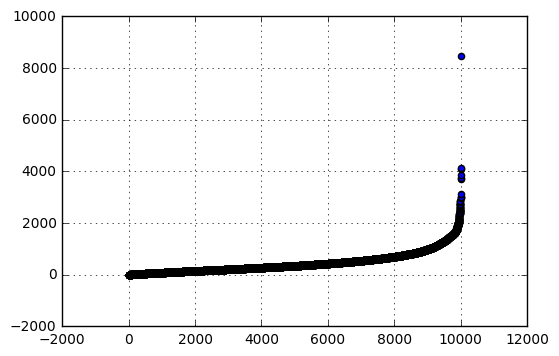

In [29]:
data = extype_data01['extype'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [38]:
extype_data_c = extype_data01.copy()
extype_data_c['extype'] = pd.cut(extype_data_c['extype'],20,labels=range(1,21))
extype_data_c['extype0'] = pd.cut(extype_data_c['extype0'],20,labels=range(1,21))
extype_data_c.head()

,extype,extype0
userid,,
1,1,1
3,2,2
4,1,1
9,1,1
10,1,2


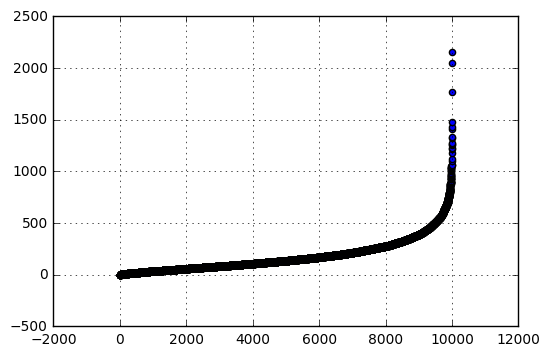

In [36]:
data = extype_data01['extype0'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [40]:
# 合并获得的特征
bank_detail_merge = extype_data_c.join([amount_data_c])
bank_detail_merge.head()

,extype,extype0,examount#0,examount#1,sub
userid,,,,,
1,1,1,13.734079,13.255397,0.478681
3,2,2,13.249264,9.834236,3.415028
4,1,1,12.128566,10.920132,1.208435
9,1,1,14.371789,12.867697,1.504092
10,1,2,12.720866,12.296680,0.424186


In [41]:
bank_detail_merge.to_csv('../data/train/bank_detail_3.csv')